In [4]:
from __future__ import print_function, division

In [5]:
# Supress warnings
import warnings

warnings.simplefilter("ignore")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

### EDA Books

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

In [4]:
# Let's do a histogram with defaults

(array([  3.,   7.,  10.,  17.,  17.,  13.,  12.,   8.,   7.,   6.]),
 array([-1.99922162, -1.63139417, -1.26356671, -0.89573925, -0.5279118 ,
        -0.16008434,  0.20774311,  0.57557057,  0.94339803,  1.31122548,
         1.67905294]),
 <a list of 10 Patch objects>)

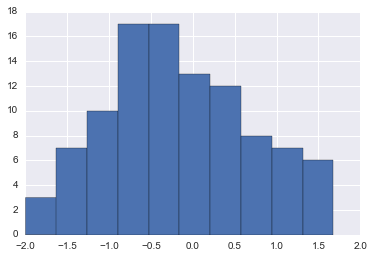

In [7]:
plt.hist(np.random.randn(100))

### Better Defaults

In [6]:
# !conda install seaborn

In [8]:
import seaborn as sns

(array([  7.,   4.,  10.,   5.,  15.,  14.,  15.,  11.,  14.,   5.]),
 array([-2.07998068, -1.68745348, -1.29492629, -0.90239909, -0.50987189,
        -0.1173447 ,  0.2751825 ,  0.66770969,  1.06023689,  1.45276409,
         1.84529128]),
 <a list of 10 Patch objects>)

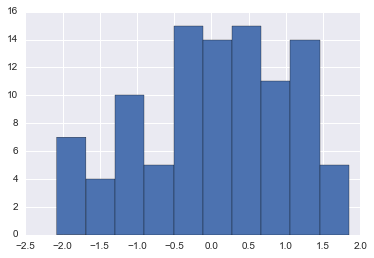

In [9]:
plt.hist(np.random.randn(100))

* What do you see different between the two plots?

## Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

Seaborn comes with some sample datasets that we will use to explore (https://github.com/mwaskom/seaborn-data)

In [10]:
titanic = sns.load_dataset("titanic")

In [11]:
# This is our familiar Pandas dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.2+ KB


In [12]:
# Remove all rows that have null Age
titanic = titanic[titanic.age.notnull()]

### Histogram (Distributions)

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

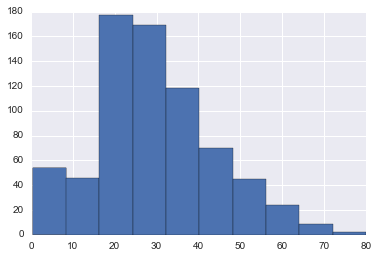

In [13]:
# We can plot distribution of Age by just using Pandas
# We don't need Seaborn for that
# Plot an histogram of age
plt.hist(titanic.age)

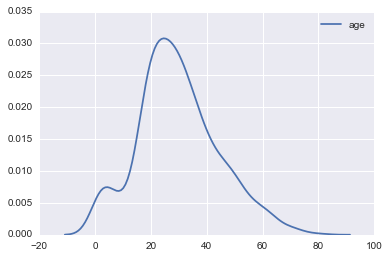

In [14]:
# But Seaborn adds some additional ways to look at distributions
# kernel density plot - estimation of distribution given sample
# problem is the domain includes negative numbers
# KDE is continuous, but data is discrete, so that's why it includes
# values outside of the support
sns.kdeplot(titanic.age)

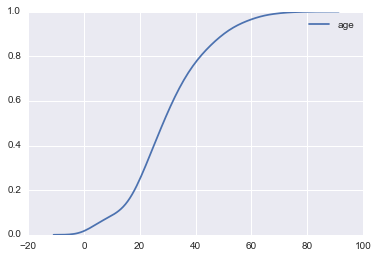

In [15]:
# Do a Cumulative Plot (CDF)
sns.kdeplot(titanic.age, cumulative=True)

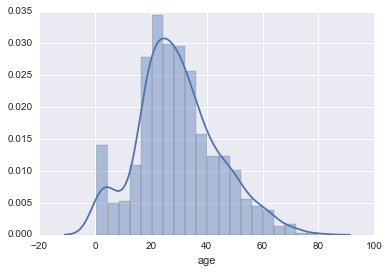

In [16]:
# Overlay Histogram and KDE with distplot

sns.distplot(titanic.age)

### Box Plots

In [16]:
# Do a Boxplot of "age" with Pandas 
# Your code here

In [17]:
# Box plot "age" by "sex"
# Your code here

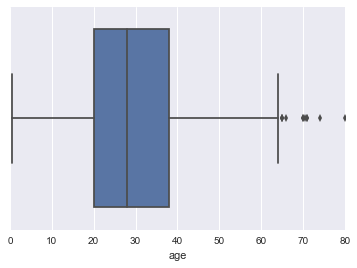

In [17]:
sns.boxplot(titanic.age) # also try with matplotlib

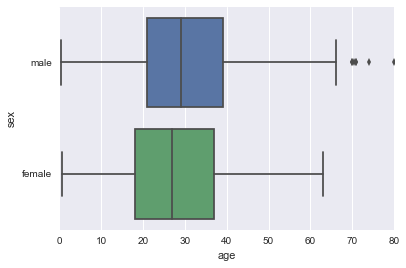

In [19]:
sns.boxplot(titanic.age, titanic.sex)
# you would have to split your df in matplotlib

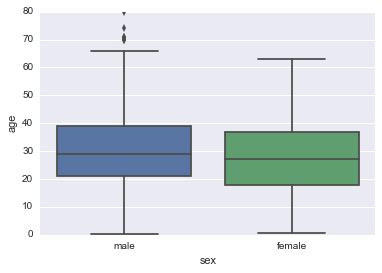

In [21]:
sns.boxplot(titanic.sex, titanic.age)

### Violin Plot

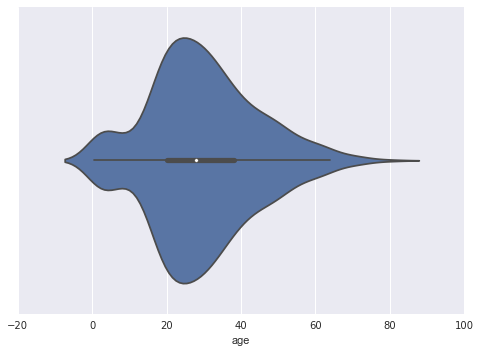

In [21]:
# combines a KDE with a boxplot inside
sns.violinplot(titanic.age)

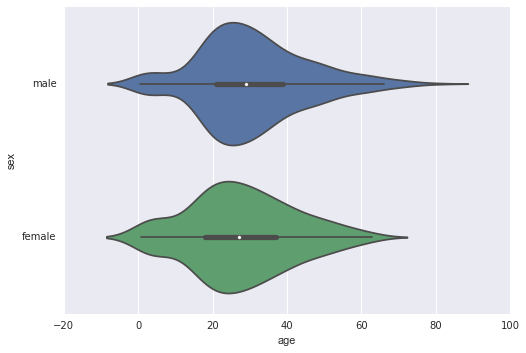

In [22]:
sns.violinplot(titanic.age, titanic.sex)

### Plot by Group

In [23]:
# Pandas Histogram of "age"
# Your code here

In [24]:
# Pandas histogram of "age" by "sex"

In [25]:
# Pandas histogram of "age" by "sex" and "survived"

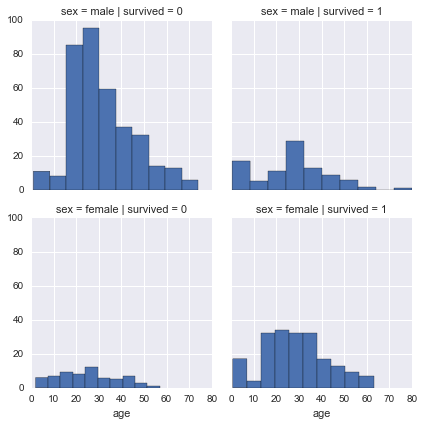

In [22]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
# - this doesn't require splitting your df by groups
# - this example shows intersection of male and survived
g = sns.FacetGrid(titanic, row='sex', col='survived', sharex=True, sharey=True)
g.map(plt.hist, "age")
# survived males are top right figure
# top left figure just shows that there's a lot more men in general

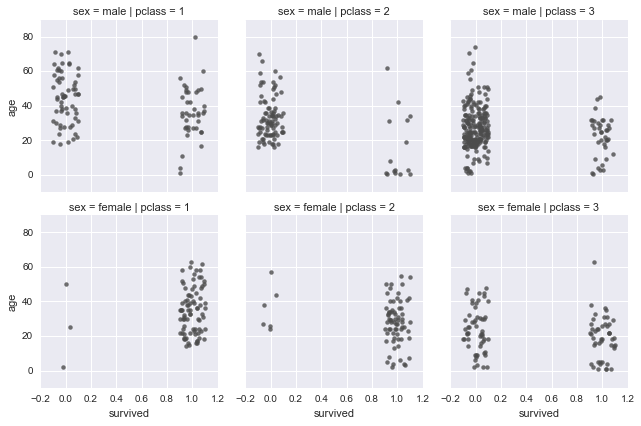

In [23]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='sex', col='pclass')
grid_plot.map(sns.regplot, 'survived', 'age',color='.3', fit_reg=False, x_jitter=.1)
# right sides of each plot is who survived
# must add 'jitter' 
# top right shows that class 3, many did not survived

### Let's look at a IRIS Dataset

In [24]:
iris = sns.load_dataset("iris")

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris.species.unique() # levels for categorical variable 'species'

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Scatter Matrix

In [30]:
# Do a Scatter Plot with Pandas on two columns - "petal_length", "petal_width"

In [31]:
# Look at pair wise comparison (scatter matrix) between all numerical variables

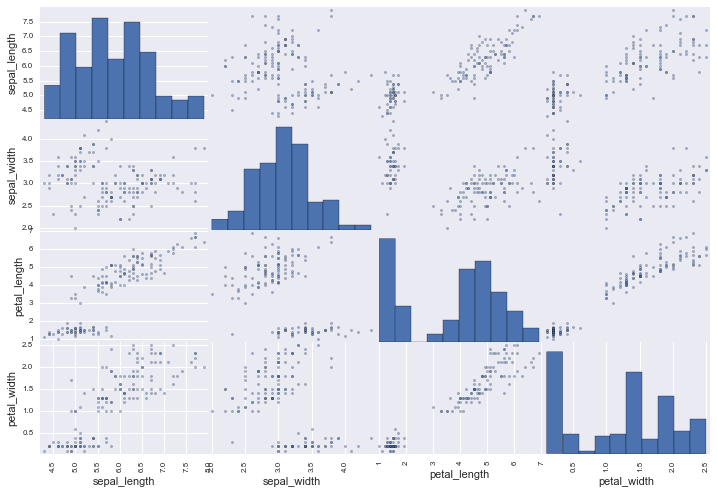

In [27]:
# Blow it up a little bit
pd.scatter_matrix(iris, figsize=(12,8));

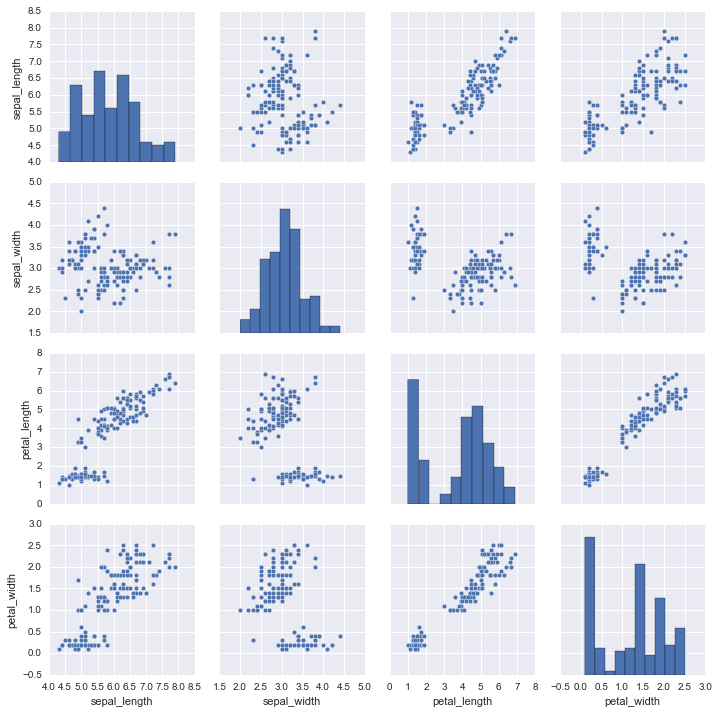

In [28]:
# Seaborn does this pair wise comparison Better
sns.pairplot(iris)

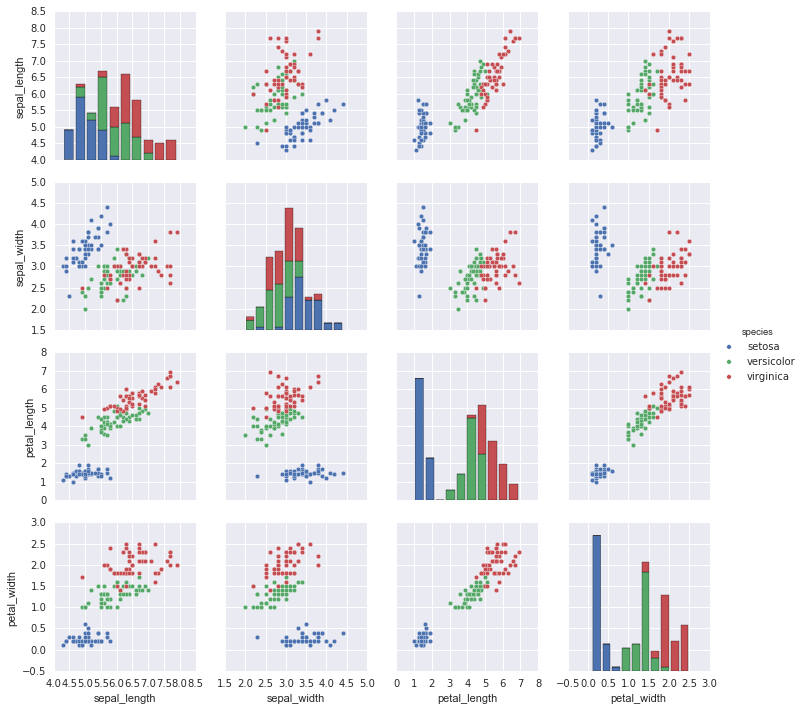

In [39]:
sns.pairplot(iris, hue="species") # specify colours based on 'species'

### Joint Plot

* Multiple plots at once

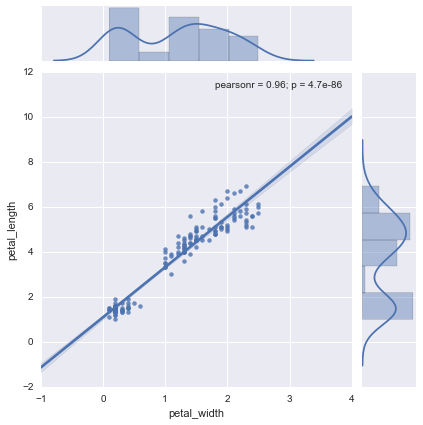

In [29]:
# shows univariate distributions, pearson correlaton and p-value
sns.jointplot("petal_width", "petal_length", kind="regplot", data=iris)